# Exploratory Data Analysis: FIFA World Cup

![](https://i.imgur.com/xrHxHdD.jpeg)

## Dataset Overview

The FIFA World Cup is the most prestigious football tournament in the world. The championship has been awarded every four years since the start of the tournament in 1930.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams quality for the tournament. In the tournament, 32 teams, including the host nation, compete for the title at different stadiums in the host country.

In this project we will find, is there anything called home team advantage? What team has the strongest defense, midfield and Which team has the most win?

Here's the outline of the steps we'll follow:

 1. Downloading the dataset from online source
 2. Data preparation and cleaning with pandas
 3. Open-ended exploratory analysis and visualization
 4. Asking and answering ineteresting questions
 5. Summarizing interferences and drawing conclusions

In [245]:
!pip install jovian --upgrade --quiet

In [246]:
import jovian

In [247]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [248]:
data = pd.read_csv('international_matches fifa.csv')

In [249]:
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyzing  information about the data

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [251]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [252]:
data.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


## Data Preprocessing

In [253]:
data = data.reset_index()
data.head()

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
data.tail()

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [255]:
end_date = data.sort_values(['home_team', 'date'], ascending=[True, False])

In [256]:
end_date

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23897,23897,2022-06-14,Afghanistan,Cambodia,Asia,Asia,150,171,1049,966,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22637,22637,2021-06-11,Afghanistan,Oman,Asia,Asia,149,80,1052,1301,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21945,21945,2019-11-19,Afghanistan,Qatar,Asia,Asia,149,57,1054,1391,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21822,21822,2019-11-14,Afghanistan,India,Asia,Asia,149,106,1054,1201,...,No,Draw,NaN,64.0,NaN,NaN,NaN,61.2,61.0,61.0
21562,21562,2019-09-10,Afghanistan,Bangladesh,Asia,Asia,149,182,1058,922,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,699,1995-01-22,Zimbabwe,Cameroon,Africa,Africa,51,31,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,231,1994-02-26,Zimbabwe,Zambia,Africa,Africa,46,30,0,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,65,1993-09-26,Zimbabwe,Guinea,Africa,Africa,47,60,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,51,1993-09-19,Zimbabwe,Senegal,Africa,Africa,50,58,0,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
data.isnull().sum()/len(data)*100

index                             0.000000
date                              0.000000
home_team                         0.000000
away_team                         0.000000
home_team_continent               0.000000
away_team_continent               0.000000
home_team_fifa_rank               0.000000
away_team_fifa_rank               0.000000
home_team_total_fifa_points       0.000000
away_team_total_fifa_points       0.000000
home_team_score                   0.000000
away_team_score                   0.000000
tournament                        0.000000
city                              0.000000
country                           0.000000
neutral_location                  0.000000
shoot_out                         0.000000
home_team_result                  0.000000
home_team_goalkeeper_score       64.972200
away_team_goalkeeper_score       66.159441
home_team_mean_defense_score     67.447013
home_team_mean_offense_score     64.424564
home_team_mean_midfield_score    65.879353
away_team_m

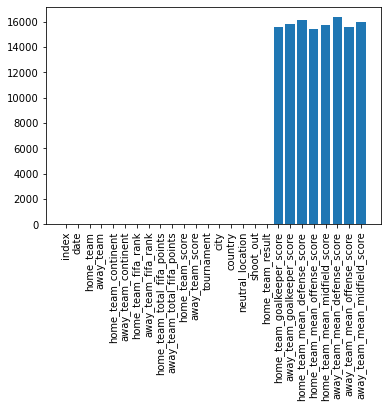

In [258]:
df=data.isnull().sum()

fig = plt.figure()
plt.xticks(rotation='90')
plt.bar(data.columns, df)
plt.show()

Converting the given date column data into datetime format.

In [259]:
data['date'] =  pd.to_datetime(data['date'].astype('datetime64[ns]'))

Plotting the graph for the team who has the highest points

In [260]:
offense_score = data.nlargest(10, 'home_team_mean_offense_score')

taking only the numeric columns

In [261]:
num_col = list(data.select_dtypes(include=['int64','float']))
num_col

['index',
 'home_team_fifa_rank',
 'away_team_fifa_rank',
 'home_team_total_fifa_points',
 'away_team_total_fifa_points',
 'home_team_score',
 'away_team_score',
 'home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score']

Plotting the graph for corrilation

In [262]:
cor_data = data.corr()

<AxesSubplot:>

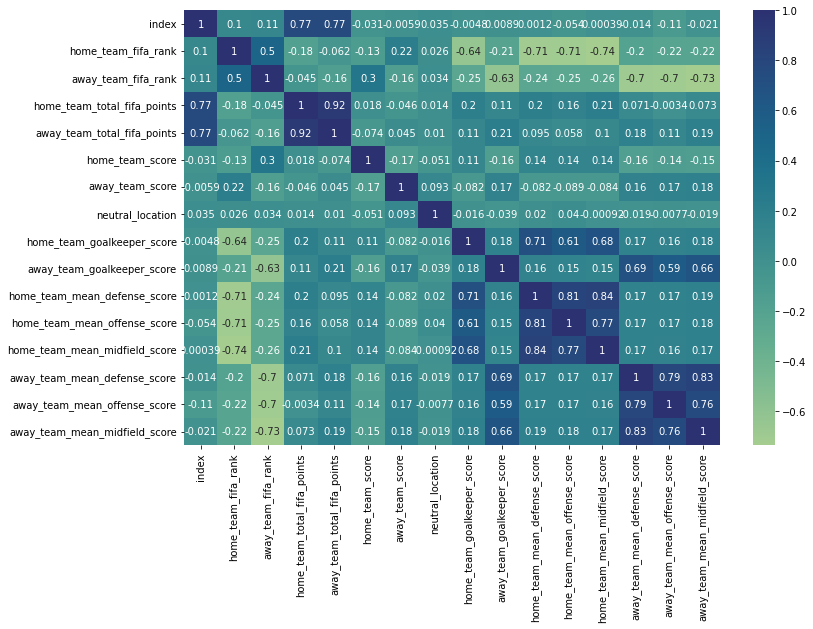

In [263]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor_data, annot=True, cmap="crest",fmt='.2g')

taking all the string columns

In [264]:
cat_col = list(data.select_dtypes(include=['object']))
cat_col

['home_team',
 'away_team',
 'home_team_continent',
 'away_team_continent',
 'tournament',
 'city',
 'country',
 'shoot_out',
 'home_team_result']

Creating the for loop so that it can check the null value columns in the given data

In [265]:
col_null_val = [col for col in data.columns if data[col].isnull().any()]
col_null_val

['home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score']

Finding all the countries present in the data

In [266]:
data.country.unique()

array(['Bolivia', 'Brazil', 'Ecuador', 'Guinea', 'Paraguay', 'Peru',
       'Zimbabwe', 'Faroe Islands', 'Sweden', 'Australia', 'Colombia',
       'Congo', 'Uruguay', 'Argentina', 'Austria', 'Denmark', 'Iceland',
       'Estonia', 'Eswatini', 'Albania', 'Bulgaria', 'England', 'Finland',
       'Hungary', 'Republic of Ireland', 'Northern Ireland', 'Norway',
       'Scotland', 'Spain', 'Venezuela', 'Morocco', 'Saudi Arabia', 'USA',
       'Romania', 'Italy', 'Tunisia', 'Korea Republic', 'Nigeria',
       'Zambia', 'Japan', 'Cyprus', 'Belgium', 'Algeria', 'Cameroon',
       'Luxembourg', 'France', 'Germany', 'Netherlands', 'Poland',
       'Portugal', 'Wales', 'Qatar', 'Gabon', 'Liechtenstein',
       'United Arab Emirates', 'Israel', 'Turkey', 'Greece', 'Malta',
       'Switzerland', 'Gambia', 'Sierra Leone', 'French Polynesia',
       'Kenya', 'Bangladesh', 'Mexico', 'Mali', 'Ghana', 'Barbados',
       'Mauritania', 'Thailand', 'Suriname', 'Burkina Faso', 'Oman',
       'Senegal', 'Mala

In [267]:
data.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

Creating the list of teams who is playing the FIFA 2022 World Cup

## Question 1

> #### Which are the teams that Qualified for the FIFA 2022?

In [268]:
fifa2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

The above given team in a list are the teams who are qualified for the FIFA 2022.

Replacing the null values with mean in the data

In [269]:
for x in fifa2022_teams:
    for y in col_null_val:
        data[y].fillna(data[data[y[0:9]]==x][y].mean(), inplace=True)

In [270]:
data.isnull().sum()

index                            0
date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

## Data Visualization

## Question 2

> #### Which Team has the higest home team FIFA points?

In [271]:
points = data.nlargest(10, ['home_team_total_fifa_points'])
points.head(10)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
20446,20446,2018-07-10,France,Belgium,Europe,Europe,2,5,2164,2124,...,No,Win,88.0,89.0,84.0,86.3,86.2,83.5,87.3,85.8
20449,20449,2018-07-15,France,Croatia,Europe,Europe,2,12,2164,2036,...,No,Win,88.0,85.0,84.0,86.3,86.2,80.8,79.3,85.8
20437,20437,2018-07-02,Brazil,Mexico,South America,North America,4,10,2160,2041,...,No,Win,83.0,79.0,86.8,87.0,83.8,77.8,81.0,80.0
20443,20443,2018-07-06,Brazil,Belgium,South America,Europe,4,5,2160,2124,...,No,Lose,83.0,89.0,86.8,87.0,83.8,83.5,87.3,85.8
20438,20438,2018-07-02,Belgium,Japan,Europe,Asia,5,41,2124,1816,...,No,Win,89.0,72.0,83.5,87.3,85.8,75.2,76.7,78.8
20448,20448,2018-07-14,Belgium,England,Europe,Europe,5,7,2124,2099,...,No,Win,89.0,82.0,83.5,87.3,85.8,82.8,83.3,82.8
20436,20436,2018-07-01,Croatia,Denmark,Europe,Europe,12,15,2036,2014,...,Yes,Win,85.0,83.0,80.8,79.3,85.8,79.5,77.3,81.0
20447,20447,2018-07-11,Croatia,England,Europe,Europe,12,7,2036,2099,...,No,Win,85.0,82.0,80.8,79.3,85.8,82.8,83.3,82.8
20442,20442,2018-07-06,Uruguay,France,South America,Europe,14,2,2017,2164,...,No,Lose,82.0,88.0,82.5,85.3,78.0,84.0,86.3,86.2
20440,20440,2018-07-03,Colombia,England,South America,Europe,17,7,1998,2099,...,Yes,Lose,79.0,82.0,78.8,82.0,80.5,82.8,83.3,82.8


<AxesSubplot:xlabel='home_team_total_fifa_points', ylabel='home_team'>

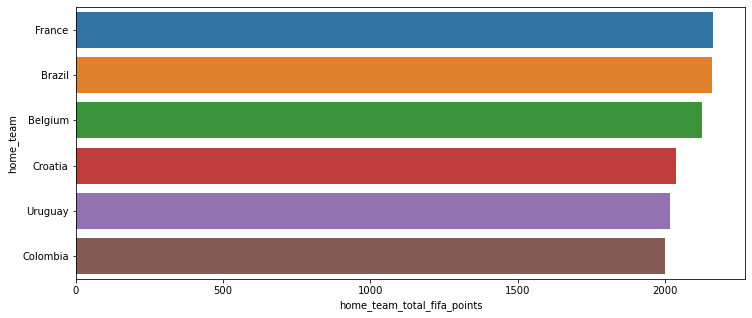

In [272]:
plt.figure(figsize=(12,5))
sns.barplot(data=points,x='home_team_total_fifa_points',y='home_team')

AS per the Analysis France has more home team FIFA points compared to other teams.

In [273]:
data['away_team_score'].value_counts()

0     9558
1     7759
2     4013
3     1551
4      594
5      214
6      107
7       67
8       27
10      11
9        9
11       3
12       2
15       2
17       1
21       1
13       1
14       1
Name: away_team_score, dtype: int64

By plotting the graph we can see the `countries` and their `FIFA` points, where `France` has more points compared to the other countries.

## Question 3

> #### Which away team had scored maximum number goals in a single match?

<AxesSubplot:xlabel='away_team_score'>

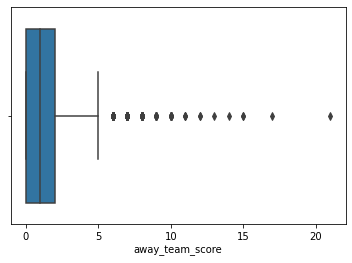

In [274]:
sns.boxplot(data['away_team_score'])

Finding out which away team has scored maximun number of goals.

By anaylzing the above boxplot we can say that there are some outliers.
By doing some research on home team `Guam` and away team `Korea DPR` which was played on 2005-03-11 in `Guam`, Team `Korea DPR` scored a massive points of <b>21</b> in that game. Even being the home event `Guam` didn't score a single point.Hence proved the `Guam` was a weak team.

In [275]:
data[data['away_team_score']==21].loc[:,:'away_team_score']

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score
8740,8740,2005-03-11,Guam,Korea DPR,Asia,Asia,205,95,0,0,0,21


<AxesSubplot:xlabel='home_team_continent', ylabel='home_team_fifa_rank'>

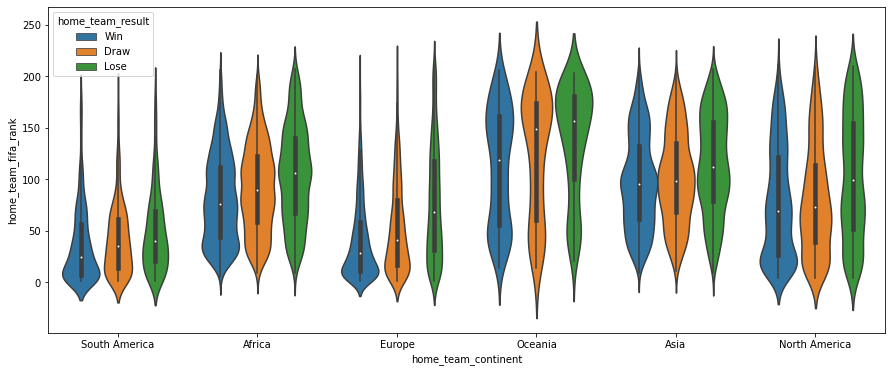

In [276]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(data=data, x='home_team_continent', y='home_team_fifa_rank',hue='home_team_result')

Analzing the Win and Lose based on Continents:

By analyzing the above violinplot plot we can tell that `Europe` and `South America` has played least amount of matches compare to other continents and can verify the rank which team has won the matches based on their rank in `FIFA Rank`

<AxesSubplot:xlabel='away_team_goalkeeper_score', ylabel='home_team_goalkeeper_score'>

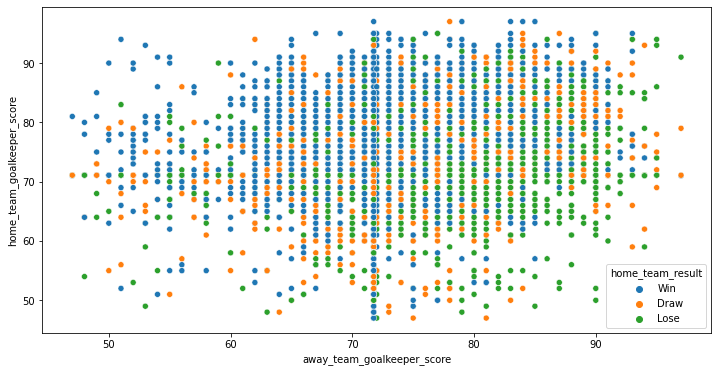

In [277]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, y='home_team_goalkeeper_score', x='away_team_goalkeeper_score',hue='home_team_result')

In the above graph based on the `home team goalkeeper score` and `away team goalkeeper score` we can verify the <b> Win, Draw, Loss </b> by the visualizing.

<AxesSubplot:xlabel='shoot_out', ylabel='home_team_score'>

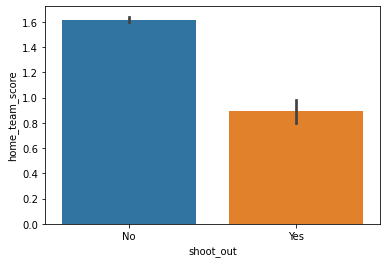

In [278]:
sns.barplot(data=data, y='home_team_score', x='shoot_out')

In this plot we can we can see the home team score with the shoot_out percentage, there are many points without the shoot out compared to points with the shoot out.

<AxesSubplot:xlabel='home_team_score', ylabel='home_team_continent'>

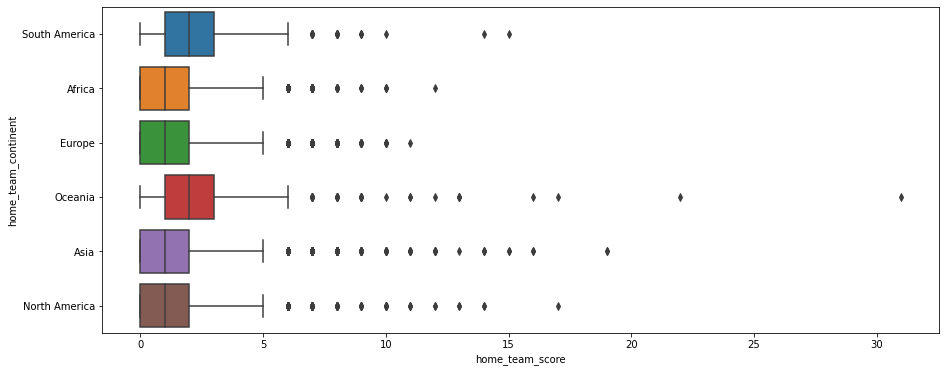

In [279]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=data,x='home_team_score', y='home_team_continent')

Using the boxplot to see the outliers of the home_team_continent with home team score

## Question 4

> #### We will find is there really any such thing called as home team advantage?

In [280]:
# Selecting the required columns to create a dataframe
home_team = data[['date','home_team_score','away_team_score']]
home_team

,date,home_team_score,away_team_score
0,1993-08-08,3,1
1,1993-08-08,1,1
2,1993-08-08,5,0
3,1993-08-08,1,0
4,1993-08-08,1,3
...,...,...,...
23916,2022-06-14,2,1
23917,2022-06-14,0,2
23918,2022-06-14,0,0
23919,2022-06-14,0,3


In [281]:
# Analyzing the games won by HomeTeam
home_team['home_team_score'] > home_team['away_team_score']
home_wins = home_team.loc[home_team['home_team_score'] > home_team['away_team_score']]
home_wins

,date,home_team_score,away_team_score
0,1993-08-08,3,1
2,1993-08-08,5,0
3,1993-08-08,1,0
6,1993-08-08,2,0
7,1993-08-09,4,0
...,...,...,...
23908,2022-06-14,3,2
23912,2022-06-14,3,2
23915,2022-06-14,2,0
23916,2022-06-14,2,1


The above table shows that there are 11591 home team wins, this doesnot include the draws.

In [282]:
# Analyzing the games lost by HomeTeam
home_team['home_team_score'] < home_team['away_team_score']
home_loss = home_team.loc[home_team['home_team_score'] < home_team['away_team_score']]
home_loss

,date,home_team_score,away_team_score
4,1993-08-08,1,3
5,1993-08-08,0,1
8,1993-08-11,0,7
9,1993-08-11,1,2
26,1993-08-31,0,1
...,...,...,...
23909,2022-06-14,0,1
23910,2022-06-14,1,4
23913,2022-06-14,0,3
23917,2022-06-14,0,2


The above table shows that there are 6623 home team loss.

In [283]:
# Renaming the columns to identify win and loss 
home_adv = home_wins[['date','home_team_score',
                      'away_team_score']].rename(columns={'home_team_score': 'Home_team_win'
                                                                                   ,'away_team_score':'Home_team_loss'})

away_adv = home_loss[['date','home_team_score',
                      'away_team_score']].rename(columns={'home_team_score': 'Home_team_win',
                                                                                   'away_team_score':'Home_team_loss'})


In [284]:
#Merging both the columns
home_advantage = home_adv.append(away_adv)
home_advantage.tail()

,date,Home_team_win,Home_team_loss
23909,2022-06-14,0,1
23910,2022-06-14,1,4
23913,2022-06-14,0,3
23917,2022-06-14,0,2
23919,2022-06-14,0,3


In [285]:
# Taking he average of win and loss
mean_val = home_advantage.mean()
mean_val

Home_team_win     1.854837
Home_team_loss    1.144394
dtype: float64

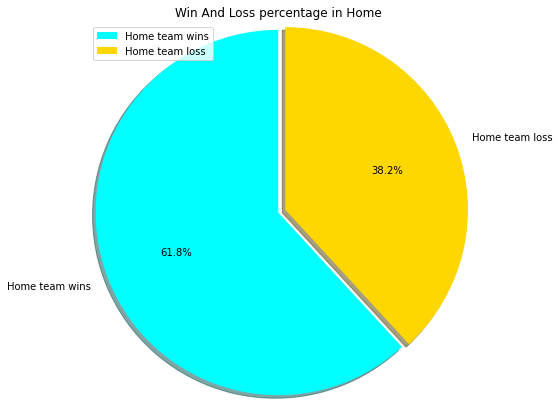

In [286]:
colors = ['cyan', 'gold']
plt.figure(figsize=(7,7))
plt.title('Win And Loss percentage in Home')
plt.pie(mean_val,colors=colors,
        labels =['Home team wins','Home team loss'],
        autopct = '%1.1f%%',startangle=90,shadow=True,
       radius = 1.2,explode = (0, 0.05))
plt.legend()

As per the observation we can see that home team wins has more than 61% of win records and we can certainly tell that there is an advantage in playing the game in the home ground.

## Question 5

> #### How many matches went Draw playing with the home team?

In [287]:
# Analyzing the games went draw by HomeTeam
home_team['home_team_score'] == home_team['away_team_score']
home_draw = home_team.loc[home_team['home_team_score'] == home_team['away_team_score']]
home_draw

,date,home_team_score,away_team_score
1,1993-08-08,1,1
13,1993-08-15,0,0
14,1993-08-15,1,1
18,1993-08-22,1,1
19,1993-08-22,1,1
...,...,...,...
23903,2022-06-14,1,1
23904,2022-06-14,1,1
23911,2022-06-14,1,1
23914,2022-06-14,2,2


There were total of 5707 matches that went Draw playing with home team where both the team equalled their scores.

## Question 6

> #### Which Team has the strongest defense?

In [288]:
# Creating Home defense table
home_defense = data[['date','home_team',
                     'home_team_mean_defense_score']].rename(columns={'home_team':'team',
                                                                                         'home_team_mean_defense_score':'defense_score'})
home_defense

,date,team,defense_score
0,1993-08-08,Bolivia,70.677528
1,1993-08-08,Brazil,70.677528
2,1993-08-08,Ecuador,70.677528
3,1993-08-08,Guinea,70.677528
4,1993-08-08,Paraguay,70.677528
...,...,...,...
23916,2022-06-14,Moldova,70.677528
23917,2022-06-14,Liechtenstein,70.677528
23918,2022-06-14,Chile,75.500000
23919,2022-06-14,Japan,75.200000


In [289]:
home_defense['team'].value_counts()

Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: team, Length: 211, dtype: int64

In [290]:
# Creating the away defense table
away_defense = data[['date','away_team',
                     'away_team_mean_offense_score']].rename(columns= {'away_team':'team',
                                                                       'away_team_mean_offense_score':'defense_score'})
away_defense

,date,team,defense_score
0,1993-08-08,Uruguay,75.347872
1,1993-08-08,Mexico,75.347872
2,1993-08-08,Venezuela,75.347872
3,1993-08-08,Sierra Leone,75.347872
4,1993-08-08,Argentina,75.347872
...,...,...,...
23916,2022-06-14,Andorra,75.347872
23917,2022-06-14,Latvia,75.347872
23918,2022-06-14,Ghana,76.000000
23919,2022-06-14,Tunisia,72.300000


In [291]:
# Merging both home and away defense table
defense = home_defense.append(away_defense)
defense

,date,team,defense_score
0,1993-08-08,Bolivia,70.677528
1,1993-08-08,Brazil,70.677528
2,1993-08-08,Ecuador,70.677528
3,1993-08-08,Guinea,70.677528
4,1993-08-08,Paraguay,70.677528
...,...,...,...
23916,2022-06-14,Andorra,75.347872
23917,2022-06-14,Latvia,75.347872
23918,2022-06-14,Ghana,76.000000
23919,2022-06-14,Tunisia,72.300000


In [292]:
defense_top = defense.sort_values(by=['defense_score','date'],ascending = [True,False])
defense_top

,date,team,defense_score
9045,2005-08-17,Angola,52.8
9036,2005-08-13,Angola,52.8
9034,2005-08-10,Angola,52.8
8909,2005-06-05,Angola,52.8
8407,2004-10-10,Angola,52.8
...,...,...,...
8678,2005-02-09,Netherlands,93.0
8485,2004-11-17,Netherlands,93.0
8427,2004-10-13,France,93.0
8391,2004-10-09,Netherlands,93.0


In [293]:
defense_top_10 = defense_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'defense_score')
defense_top_10

,date,team,defense_score
8391,2004-10-09,Netherlands,93.0
8316,2004-09-08,France,93.0
9220,2005-10-09,Brazil,92.7
8334,2004-09-08,Italy,92.3
19881,2017-10-10,Argentina,90.7
8382,2004-10-09,England,90.5
8313,2004-09-08,Spain,89.3
20506,2018-09-07,Belgium,88.3
8318,2004-09-08,Germany,87.5
10808,2007-10-13,Portugal,87.3


In [294]:
data['home_team_result'].value_counts()

Win     11761
Lose     6771
Draw     5389
Name: home_team_result, dtype: int64

<AxesSubplot:title={'center':'Top 10 strongest defense'}, xlabel='team', ylabel='defense_score'>

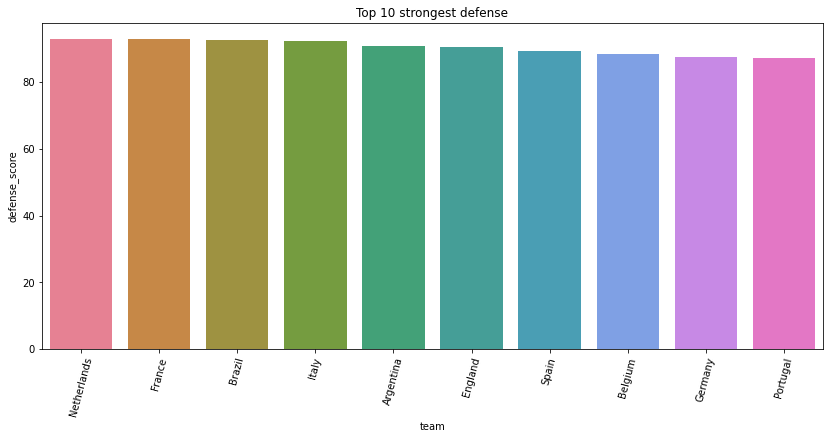

In [295]:
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest defense")
plt.xticks(rotation=75)
sns.barplot(data=defense_top_10, x='team',y='defense_score', palette = "husl")


As per the analysis we can see that Serbia has more strongest score compared to other teams.

## Question 7

> #### Which Team has the strongest midfield players?

In [296]:
# Top 10 strongest midfield
home_midfield = data[['date','home_team','home_team_mean_midfield_score']].rename(columns ={'home_team':'team','home_team_mean_midfield_score':'midfield_score'})
home_midfield

,date,team,midfield_score
0,1993-08-08,Bolivia,74.887342
1,1993-08-08,Brazil,74.887342
2,1993-08-08,Ecuador,74.887342
3,1993-08-08,Guinea,74.887342
4,1993-08-08,Paraguay,74.887342
...,...,...,...
23916,2022-06-14,Moldova,74.887342
23917,2022-06-14,Liechtenstein,74.887342
23918,2022-06-14,Chile,78.200000
23919,2022-06-14,Japan,77.500000


In [297]:
away_midfield = data[['date','away_team','away_team_mean_midfield_score']].rename(columns ={'away_team':'team','away_team_mean_midfield_score':'midfield_score'})
away_midfield

,date,team,midfield_score
0,1993-08-08,Uruguay,74.980851
1,1993-08-08,Mexico,74.980851
2,1993-08-08,Venezuela,74.980851
3,1993-08-08,Sierra Leone,74.980851
4,1993-08-08,Argentina,74.980851
...,...,...,...
23916,2022-06-14,Andorra,74.980851
23917,2022-06-14,Latvia,74.980851
23918,2022-06-14,Ghana,78.200000
23919,2022-06-14,Tunisia,74.000000


In [298]:
midfield = home_midfield.append(away_midfield)

In [299]:
midfield.dropna(subset=['midfield_score'],inplace=True)
midfield_top = midfield.sort_values(by=['team','date'],ascending = [True,False])
midfield_top

,date,team,midfield_score
23897,2022-06-14,Afghanistan,74.887342
23843,2022-06-11,Afghanistan,74.980851
23781,2022-06-08,Afghanistan,74.980851
23666,2022-06-01,Afghanistan,74.980851
23273,2021-11-16,Afghanistan,74.980851
...,...,...,...
75,1993-10-10,Zimbabwe,74.980851
65,1993-09-26,Zimbabwe,74.887342
51,1993-09-19,Zimbabwe,74.887342
32,1993-09-06,Zimbabwe,74.980851


In [300]:
midfield_top_10 = midfield_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'midfield_score')
midfield_top_10

,date,team,midfield_score
9505,2006-03-01,Serbia,81.500000
6874,2003-03-16,Afghanistan,74.980851
2456,1997-06-22,Andorra,74.980851
2970,1998-04-15,Anguilla,74.980851
845,1995-04-30,Antigua and Barbuda,74.980851
4,1993-08-08,Argentina,74.980851
1354,1996-03-24,Aruba,74.980851
502,1994-09-07,Azerbaijan,74.980851
3658,1999-05-05,Bahamas,74.980851
338,1994-05-25,Belarus,74.980851


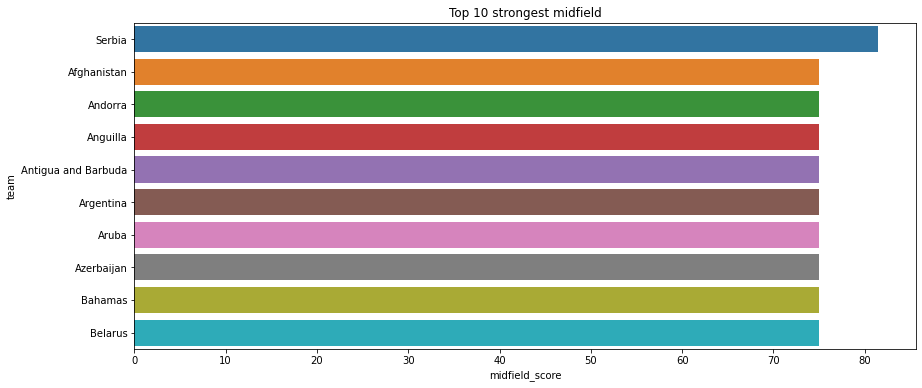

In [301]:
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest midfield")
sns.barplot(data=midfield_top_10, y='team',x='midfield_score');

As per the analysis we can see that Serbia has more midfield score compared to other teams.

In [302]:
data.columns

Index(['index', 'date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Question 8

> #### Which Team has won most of the games?

In [303]:
# Which team has the most win
home_team = data[['date','home_team','home_team_score','away_team_score']]

home_team.head(20)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [304]:
home_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             23921 non-null  datetime64[ns]
 1   home_team        23921 non-null  object        
 2   home_team_score  23921 non-null  int64         
 3   away_team_score  23921 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 747.7+ KB


In [305]:
# Matches won by Home Team. 
home_team['home_team_score']>home_team['away_team_score']
homewins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]
homewins.head()

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [306]:
# Matches won by Away Team
home_team['home_team_score']<home_team['away_team_score']
homeloss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
homeloss.head()


,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [307]:
# Merging Both the tables
hometeam_wins = homewins[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team' : 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
awayteam_wins = homeloss[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team': 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
Team_streak = hometeam_wins.append(awayteam_wins)

Team_streak.head()

,date,team,Home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [308]:
#sorting the values 
top_streak = Team_streak.sort_values(by=['team','date'],ascending = [False,True])
top_streak.head()

,date,team,Home_team_win,away_team_win
6,1993-08-08,Zimbabwe,2,0
51,1993-09-19,Zimbabwe,2,0
65,1993-09-26,Zimbabwe,1,0
699,1995-01-22,Zimbabwe,4,1
1235,1996-01-07,Zimbabwe,1,2


In [309]:
top_streak['team'].value_counts().nlargest(5)

USA             253
Mexico          243
Saudi Arabia    219
Japan           211
Egypt           195
Name: team, dtype: int64

As per the analysis report as we can see that USA has total of 253 wins among all the teams and tells that USA is the strongest team.

## Summary:
In the Given dataset. We explored and learned many things like,

- How to fill NaN values.

- Where we can use the concept of code reusability.

- In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data and created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve it by visualizing and applying conditions.

- Now, we just saw some of the insights where team performance where analysed with the help of EDA.

## Future Work

- We can apply Machine Learning algorithm to predict the match wins.

- We can deploy the project using gradio

## References

- Jovian: https://www.youtube.com/watch?v=kLDTbavcmd0
        
- Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
        
- Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis